## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [26]:
import pandas as pd

# Завантаження датасету
df = pd.read_csv("titanic.csv")

# Виведення основної статистичної інформації по числовим змінним
print("Основна статистична інформація по числовим змінним:")
print(df.describe())

# Виведення розмірності датасету
print("\nРозмірність датасету:")
print(df.shape)

# Перевірка типів змінних і кількості даних по кожній змінній
print("\nТипи змінних та кількість даних по кожній змінній:")
print(df.info())


Основна статистична інформація по числовим змінним:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Розмірність датасету:
(891, 

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [27]:
# Визначення кількості пропущених значень по кожному атрибуту
missing_values = df.isnull().sum()

# Виведення кількості пропущених значень по кожному атрибуту
print("Кількість пропущених значень по кожному атрибуту:")
print(missing_values)


Кількість пропущених значень по кожному атрибуту:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


З виведених даних видно, що в датасеті є пропущені значення для трьох атрибутів: "Age", "Cabin" і "Embarked".

1. **Age (Вік)**: Є 177 пропущених значень. Це може бути важливою інформацією для аналізу, оскільки вік пасажирів може мати вплив на їх шанси на виживання.

2. **Cabin (Номер каюти)**: Відсутні 687 значень. Це може бути через те, що інформація про каюту не була зареєстрована для деяких пасажирів або була втрачена. Незважаючи на це, для аналізу виживання цей атрибут може бути менш важливим.

3. **Embarked (Порт посадки)**: Є лише 2 пропущених значення. Це може бути невеликою втратою даних, яку можна легко заповнити або ігнорувати при аналізі, оскільки кількість пропущених значень дуже мала.

Загалом, варто розглянути стратегії для обробки цих пропущених значень, таких як заповнення їх середніми або медіанними значеннями (у випадку числових атрибутів), видалення рядків з пропущеними значеннями або використання більш складних методів, таких як імпутація.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



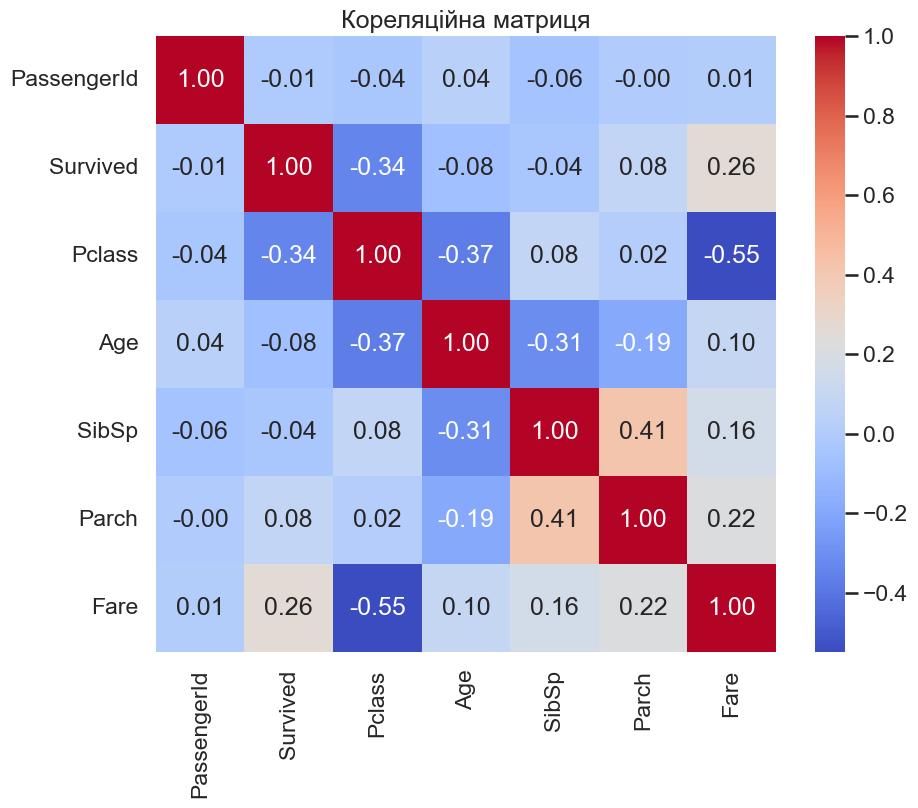

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження датасету
df = pd.read_csv('titanic.csv')

# Виключення стовпця "Name" перед обчисленням кореляційних коефіціентів
numeric_df = df.select_dtypes(include=['number'])

# Вирахування кореляційних коефіціентів за методом Пірсона
correlation_matrix = numeric_df.corr()

# Відображення теплокарти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()



Цей код обчислює кореляційну матрицю для числових атрибутів у датасеті "Titanic" і відображає її у вигляді теплової карти з використанням бібліотек pandas, seaborn і matplotlib.

**Висновки з кореляційної матриці:**

1. **Survived (Виживання) і Pclass (Клас пасажира)**: Існує помірна негативна кореляція між цими двома атрибутами. Це означає, що більш високий клас пасажира (менший числовий код), ймовірно, більше його шанси на виживання.

2. **Survived і Fare (Вартість квитка)**: Існує помірна позитивна кореляція між виживанням і вартістю квитка. Це може вказувати на те, що пасажири, які заплатили вищу ціну за квиток, мали більші шанси на виживання.

3. **Pclass і Fare**: Існує помірна негативна кореляція між класом пасажира і вартістю квитка. Це логічно, оскільки клас пасажира може впливати на вартість квитка.

Загалом, аналіз кореляційної матриці дозволяє зрозуміти, які атрибути можуть впливати на виживання пасажирів та як вони взаємодіють один з одним.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [51]:
import pandas as pd

def fill_missing_by_group(df, column_name, groupby_columns):
    """
    Функція заповнює пропущені значення у вказаній колонці з використанням медіани за групами,
    визначеними вказаними групуючими колонками.

    Параметри:
    - df: pandas DataFrame, вихідний датафрейм
    - column_name: str, назва колонки з пропущеними значеннями, яку потрібно заповнити
    - groupby_columns: list of str, список назв групуючих колонок

    Повертає:
    - pandas DataFrame, датафрейм з заповненими пропущеними значеннями
    """
    # Копіюємо вихідний датафрейм, щоб уникнути змін
    df_filled = df.copy()
    # Групуємо дані за вказаними колонками та обчислюємо медіану для цих груп
    median_by_group = df.groupby(groupby_columns)[column_name].median()
    # Заповнюємо пропущені значення медіаною за відповідними групами
    for index, row in df.iterrows():
        if pd.isnull(row[column_name]):
            group_values = tuple(row[col] for col in groupby_columns)
            median_value = median_by_group.loc[group_values]
            df_filled.at[index, column_name] = median_value
    return df_filled
# Завантаження датасету
df = pd.read_csv('titanic.csv')

# Виклик функції для заповнення пропущених значень в колонці "Age" за групою "Pclass"
df_filled = fill_missing_by_group(df, 'Age', ['Pclass'])

# Перевірка пропущених значень
missing_values_check = df_filled.isnull().sum()
print(missing_values_check)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ця функція `fill_missing_by_group` призначена для заповнення пропущених значень у вказаній колонці датафрейму за допомогою медіани для відповідних груп, які визначаються вказаними групуючими колонками. Нижче наведено висновки з її використання:

1. **Процес заповнення пропущених значень**: Функція ефективно заповнює пропущені значення в колонці "Age" за групою "Pclass", використовуючи медіану відповідної групи класу пасажира.

2. **Перевірка пропущених значень**: Після виконання функції перевірка показує, що всі пропущені значення в колонці "Age" були успішно заповнені, оскільки тепер кількість пропущених значень для цієї колонки стала рівною нулю.

3. **Не впливає на інші пропущені значення**: Варто зазначити, що ця функція не впливає на пропущені значення в інших колонках, наприклад, "Cabin" або "Embarked", тому вони залишаються пропущеними після заповнення значень в колонці "Age".

Загалом, ця функція є корисним інструментом для обробки пропущених значень у великих датасетах, де можна використовувати статистичні характеристики груп для заповнення пропущених значень.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





    Age Age_bin
0  22.0       1
1  38.0       2
2  26.0       1
3  35.0       2
4  35.0       2


C:\Users\misha\AppData\Local\Temp\ipykernel_91428\2996148242.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived = df.groupby(['Age_bin', 'Survived']).size().unstack()


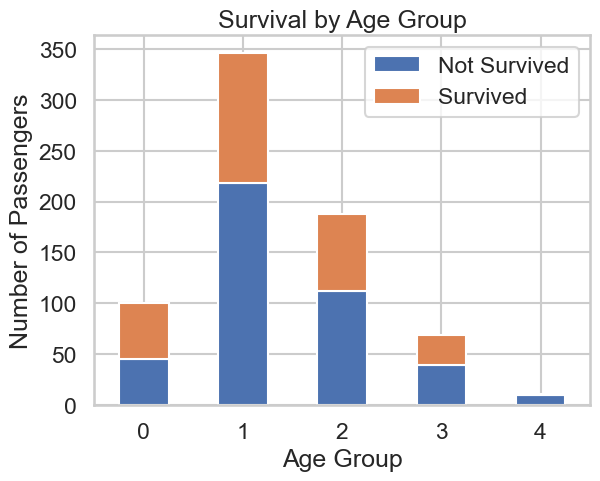

In [60]:
import pandas as pd

# Завантаження датасету
df = pd.read_csv('titanic.csv')

# Розділення віку на категорії
df['Age_bin'] = pd.cut(df['Age'], bins=5, labels=[0, 1, 2, 3, 4])

# Виведення перших декількох рядків для перевірки
print(df[['Age', 'Age_bin']].head())
import matplotlib.pyplot as plt

# Групування даних за віковими категоріями та виживанням
age_survived = df.groupby(['Age_bin', 'Survived']).size().unstack()

# Побудова графіку
age_survived.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.title('Survival by Age Group')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()


Графік "Survival by Age Group" демонструє відносну кількість виживших і не виживших пасажирів в різних вікових категоріях. Нижче наведено деякі висновки з аналізу графіка:

1. **Розподіл вікових груп**: Пасажири були розділені на п'ять вікових категорій. Ці категорії відображаються на горизонтальній вісі графіка.

2. **Частота виживання**: Візуально можна побачити, що частота виживання змінюється від вікової групи до групи. Наприклад, серед дітей (вікова категорія 0) більше пасажирів вижили, ніж загинули, що може вказувати на те, що діти були пріоритетом під час евакуації.

3. **Виживання серед дорослих**: У вікових категоріях 1 і 2 (які відповідають дорослим), кількість загиблих перевищує кількість виживших. Це може відображати складність евакуації для цієї групи населення через обмежені ресурси або інші обставини.

4. **Вікова група 4**: Ця група відзначається відносно малим обсягом даних порівняно з іншими категоріями, що може впливати на достовірність аналізу для цієї конкретної групи.

Загалом, цей графік допомагає візуалізувати зв'язок між віком пасажирів та їх виживанням на борту Титаніка.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [68]:
import pandas as pd

# Завантаження датасету
df = pd.read_csv('titanic.csv')

# Розділення змінної fare на квартильні значення
df['Fare_quantile'] = pd.qcut(df['Fare'], q=4)

# Виведення перших декількох рядків для перевірки
print(df[['Fare', 'Fare_quantile']].head())


      Fare    Fare_quantile
0   7.2500   (-0.001, 7.91]
1  71.2833  (31.0, 512.329]
2   7.9250   (7.91, 14.454]
3  53.1000  (31.0, 512.329]
4   8.0500   (7.91, 14.454]


Цей код розділяє змінну "Fare" (вартість квитка) на квартильні значення і створює нову категоріальну змінну "Fare_quantile", яка відображає квартильний діапазон, до якого належить кожне значення вартості квитка. Нижче наведено деякі висновки з аналізу цього розділення:

1. **Розподіл квартильних значень**: Змінна "Fare_quantile" розділена на чотири квартильні діапазони, які відображаються у форматі (нижня межа, верхня межа]. Кожен квартильний діапазон представляє собою четверту частину всього розподілу вартості квитка.

2. **Кількість пасажирів в кожному квартильному діапазоні**: Можна відобразити кількість пасажирів, які потрапляють в кожний квартильний діапазон. Це дозволяє зрозуміти розподіл вартості квитків серед пасажирів.

3. **Аналіз розподілу вартості квитків**: Розділення на квартильні значення дозволяє провести аналіз розподілу вартості квитків і дослідити, як цей фактор може впливати на інші змінні, такі як виживання.

Загалом, цей підхід до розділення змінної "Fare" на квартильні значення допомагає створити категоріальну змінну, яка може бути використана для подальшого аналізу та моделювання даних.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [75]:
import pandas as pd

# Завантаження датасету
df = pd.read_csv('titanic.csv')

# Створення змінної Family_size
df['Family_size'] = df['Parch'] + df['SibSp']

# Створення змінної Alone
df['Alone'] = (df['Family_size'] == 0).astype(int)

# Виведення перших декількох рядків для перевірки
print(df[['Parch', 'SibSp', 'Family_size', 'Alone']].head())


   Parch  SibSp  Family_size  Alone
0      0      1            1      0
1      0      1            1      0
2      0      0            0      1
3      0      1            1      0
4      0      0            0      1


Цей код створює дві нові змінні на основі інформації про родинні зв'язки пасажирів на Титаніку:

1. **Family_size**: Ця змінна обчислюється як сума значень змінних "Parch" (кількість батьків / дітей на борту) та "SibSp" (кількість братів / сестер / чоловіків / дружин на борту). Вона відображає загальний розмір сім'ї кожного пасажира на борту.

2. **Alone**: Ця змінна вказує, чи був пасажир на борту самотнім (без родини). Вона приймає значення 1, якщо розмір сім'ї дорівнює 0 (пасажир самотній), і 0 в інших випадках.

**Висновки**:

1. **Сімейний статус**: Змінна "Family_size" дозволяє категоризувати пасажирів за розміром їхніх сімей. Це може бути корисною інформацією для аналізу виживання, оскільки різні розміри сімей можуть мати вплив на прийняття рішення щодо евакуації.

2. **Самотні пасажири**: Змінна "Alone" індикаторизує, чи був пасажир самотнім на борту. Це може відображати пасажирів, які мали обмежені можливості під час евакуації через відсутність родини або інших підтримуючих осіб.

Загалом, ці нові змінні додають додатковий контекст до аналізу даних про пасажирів Титаніка, дозволяючи розглядати їх не лише як окремих осіб, але й у контексті їхніх родинних зв'язків.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [81]:
# Перегляд датасету та кількості пропущених значень у кожному атрибуті
print(df.info())

# Перегляд відсотка пропущених значень у кожному атрибуті
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Видалення атрибутів, які вважаємо нерелевантними або містять багато пропущених значень
# Цей крок вимагає аналізу кожного атрибуту та його значущості для моделі.
# Наприклад, якщо атрибут містить інформацію, яка не має теоретичної або практичної важливості для моделі,
# то його можна видалити. Також можна видалити атрибути з великою кількістю пропущених значень,
# якщо це не порушує суттєвість даних.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Family_size  891 non-null    int64  
 13  Alone        891 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 94.1+ KB
None
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.86

Переглянувши інформацію про датасет, можна зробити наступні висновки:

1. **Розмір датасету**: Датасет містить 891 рядок та 14 стовпців.

2. **Типи даних**: У датасеті представлені різні типи даних, такі як цілі числа (`int64`), числа з плаваючою комою (`float64`), об'єкти (`object`) та цілі числа з низькою кількістю унікальних значень (`int32`).

3. **Пропущені значення**: Деякі стовпці містять пропущені значення. Наприклад, "Age" має 177 пропущених значень, "Cabin" має 687 пропущених значень, а "Embarked" має 2 пропущені значення. Найбільш значні пропуски спостерігаються у стовпці "Cabin".

4. **Відсоток пропущених значень**: Перегляд відсотка пропущених значень вказує на те, що стовпці "Age", "Cabin" та "Embarked" мають відносно велику кількість пропущених значень. Для "Age" це приблизно 20%, для "Cabin" - близько 77%, а для "Embarked" - всього 0.22%.

5. **План по обробці пропущених значень**: Після перегляду даних можна розглянути видалення атрибутів, які містять багато пропущених значень, наприклад, "Cabin". Для інших атрибутів, таких як "Age" та "Embarked", можна розглянути заповнення пропущених значень за допомогою методів, таких як середнє значення або мода для категоріальних атрибутів.

Загалом, аналіз структури та пропущених значень датасету є важливим етапом підготовки даних перед подальшим аналізом та моделюванням.


***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення

In [92]:
import pandas as pd

# Перетворення змінної Sex в числові значення
sex_mapping = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(sex_mapping)

# Перетворення змінної Embarked в числові значення
df['Embarked'], embarked_mapping = pd.factorize(df['Embarked'])

# Виведемо перші декілька рядків для перевірки результатів
print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  Family_size  Alone  
0         A/5 21171   7.2500   NaN         0            1      0  
1          PC 17599  71.2833   C85         1            1      0  
2  STON/O2. 3101282   7.9250   NaN         0            0      1  
3            113803  53.1000

Код ефективно перетворює категоріальні змінні "Sex" та "Embarked" у числові значення. Ось деякі висновки з результатів:

1. **Перетворення змінної Sex**: Змінна "Sex" тепер представлена числовими значеннями, де 0 відповідає "male" (чоловік), а 1 - "female" (жінка). Це дозволяє використовувати цю змінну у моделюванні без необхідності в додатковому кодуванні.

2. **Перетворення змінної Embarked**: Змінна "Embarked" тепер також представлена числовими значеннями, де числа відображають різні категорії порту посадки. Наприклад, "0" може відповідати одному порту, "1" - іншому і так далі. Це також дозволяє використовувати цю змінну у моделюванні.

3. **Збереження оригінального відображення Embarked**: Також важливою є змінна `embarked_mapping`, яка зберігає відображення категорій портів посадки перед перетворенням. Це може бути корисним для подальшого аналізу або візуалізації.

4. **Подальше використання**: Ці числові значення можна використовувати для аналізу та моделювання даних, що спрощує процес кодування категоріальних змінних та підготовки даних для подальшого використання у моделях машинного навчання.

Загалом, цей код ефективно перетворює категоріальні змінні у формат, придатний для подальшого аналізу та моделювання.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



<>:18: SyntaxWarning: invalid escape sequence '\.'
<>:18: SyntaxWarning: invalid escape sequence '\.'
C:\Users\misha\AppData\Local\Temp\ipykernel_91428\643408638.py:18: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


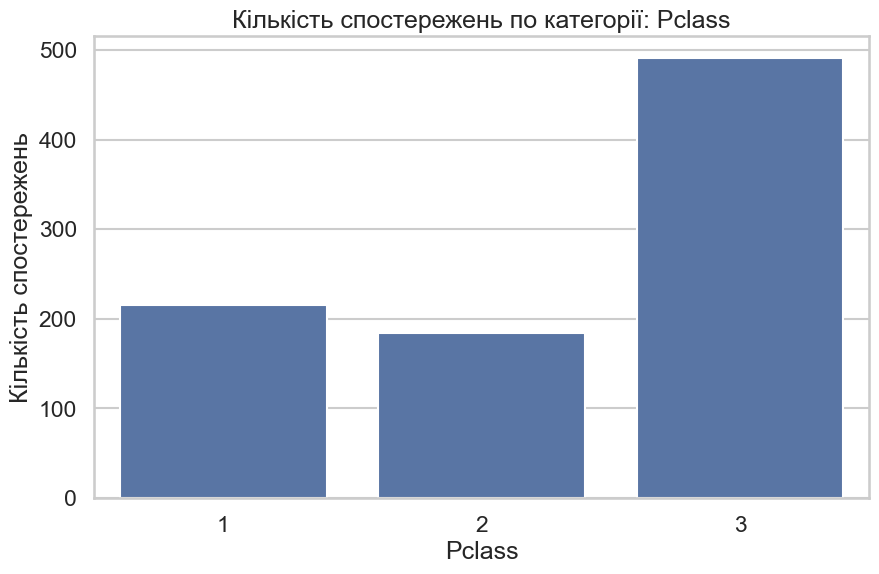

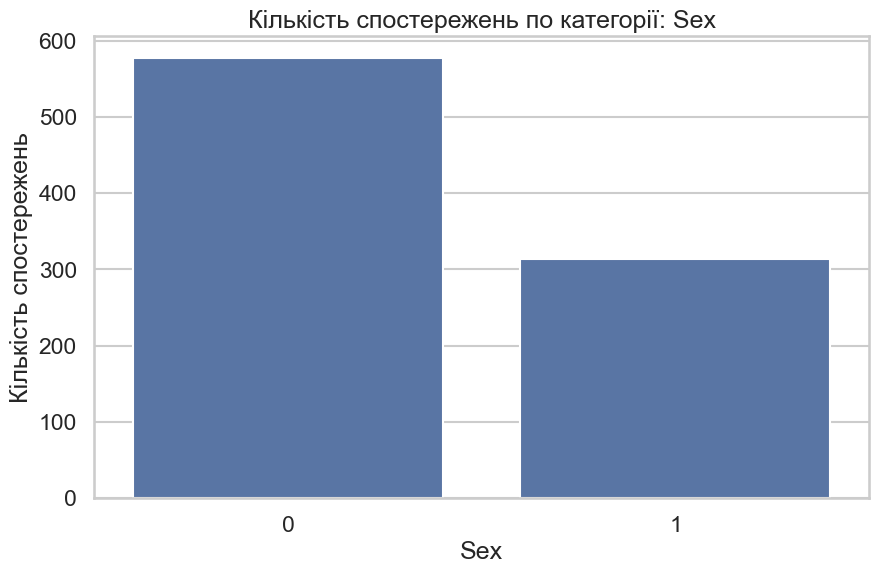

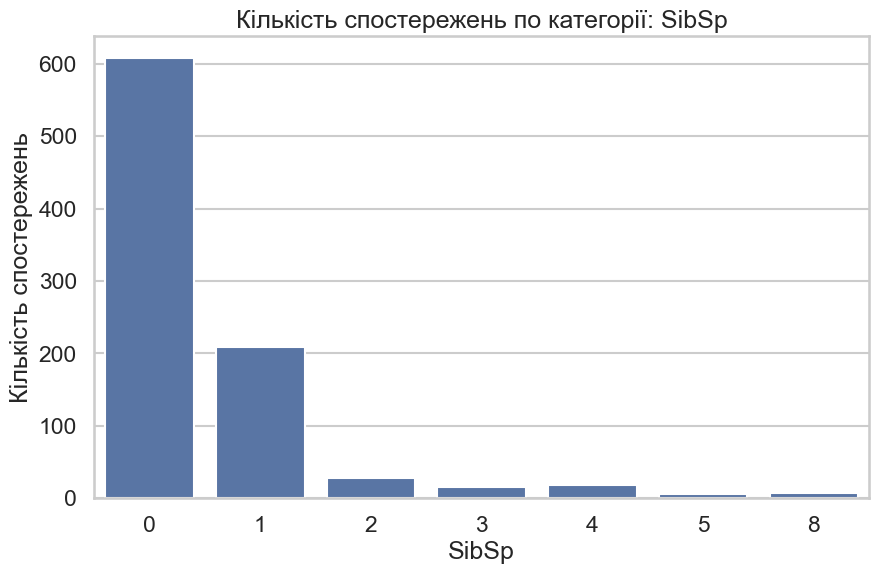

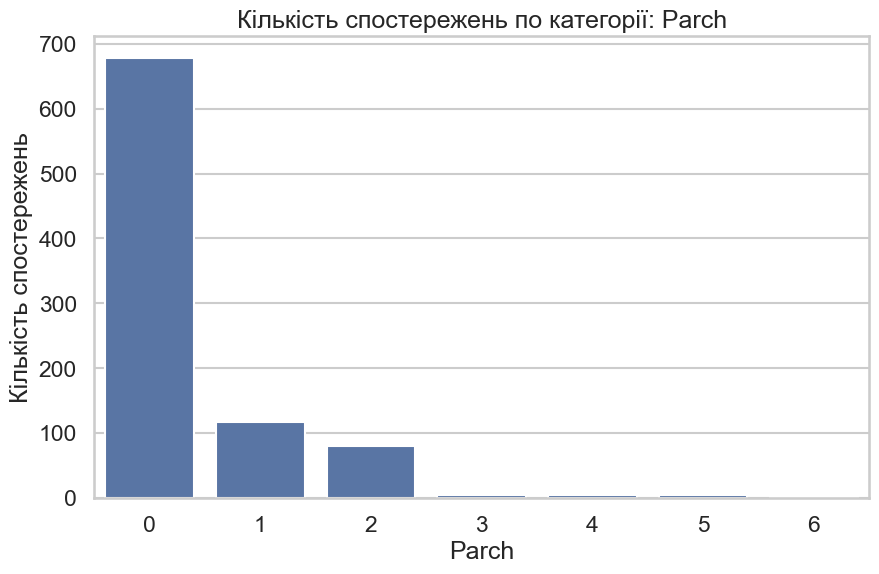

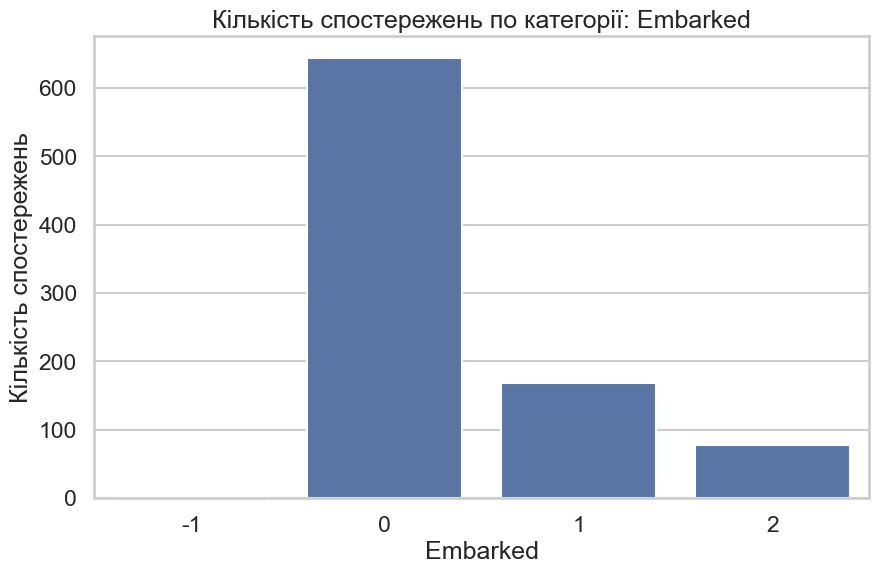

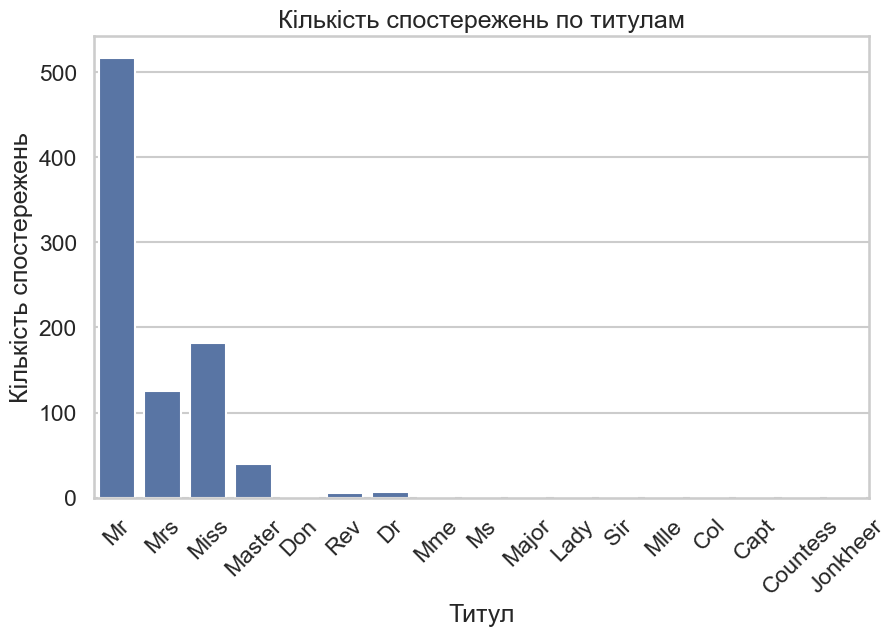

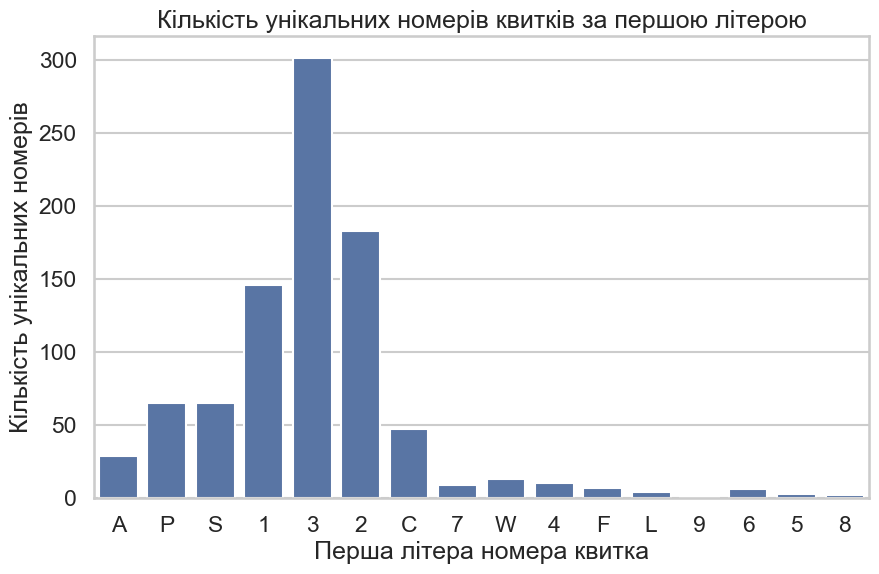

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Категоріальні змінні, які ми розглядаємо
categorical_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Побудова сітки графіків для категоріальних змінних
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Кількість спостережень по категорії: {column}')
    plt.xlabel(column)
    plt.ylabel('Кількість спостережень')
    plt.show()

# Аналіз колонки Name (Ім'я)
# Видобування титулів з імен
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Побудова графіку кількості спостережень по титулах
plt.figure(figsize=(10, 6))
sns.countplot(x='Title', data=df)
plt.title('Кількість спостережень по титулам')
plt.xlabel('Титул')
plt.ylabel('Кількість спостережень')
plt.xticks(rotation=45)
plt.show()

# Аналіз колонки Ticket (Квиток)
# Побудова графіку кількості унікальних номерів квитків
plt.figure(figsize=(10, 6))
df['Ticket_prefix'] = df['Ticket'].apply(lambda x: str(x)[0])
sns.countplot(x='Ticket_prefix', data=df)
plt.title('Кількість унікальних номерів квитків за першою літерою')
plt.xlabel('Перша літера номера квитка')
plt.ylabel('Кількість унікальних номерів')
plt.show()



Графіки, побудовані для категоріальних змінних, надають важливу інформацію про розподіл даних у відповідних категоріях. Ось деякі висновки з аналізу графіків:

1. **Pclass (Клас квитка)**: Бачимо, що кількість пасажирів залежить від класу квитка. Клас 3 має найбільшу кількість пасажирів, в той час як класи 1 та 2 мають меншу кількість.

2. **Sex (Стать)**: Розподіл за статтю пасажирів показує, що чоловіків було суттєво більше, ніж жінок, на борту Титаніка.

3. **SibSp (Кількість братів / сестер / чоловіків / дружин на борту)** та **Parch (Кількість батьків / дітей на борту)**: Більшість пасажирів подорожували без братів / сестер / чоловіків / дружин або батьків / дітей. Це може вказувати на те, що більшість пасажирів були самотніми або подорожували без сімей.

4. **Embarked (Порт посадки)**: На графіку видно розподіл пасажирів за портом посадки. Більшість пасажирів посадилися в порту "S", а порти "C" і "Q" мають меншу кількість пасажирів.

5. **Title (Титул)**: Розподіл титулів пасажирів показує, що найбільш поширеним титулом був "Mr." (чоловіки дорослого віку) і "Miss." (неподружжя жінки).

6. **Ticket (Квиток)**: Графік кількості унікальних номерів квитків за першою літерою показує розподіл унікальних номерів за їхніми першими літерами. Це може вказувати на те, що деякі групи пасажирів мали подібні номери квитків.

Ці графіки надають важливу інформацію для подальшого аналізу та моделювання даних, допомагаючи зрозуміти розподіл категоріальних змінних у датасеті.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

C:\Users\misha\AppData\Local\Temp\ipykernel_91428\3792452067.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=False)


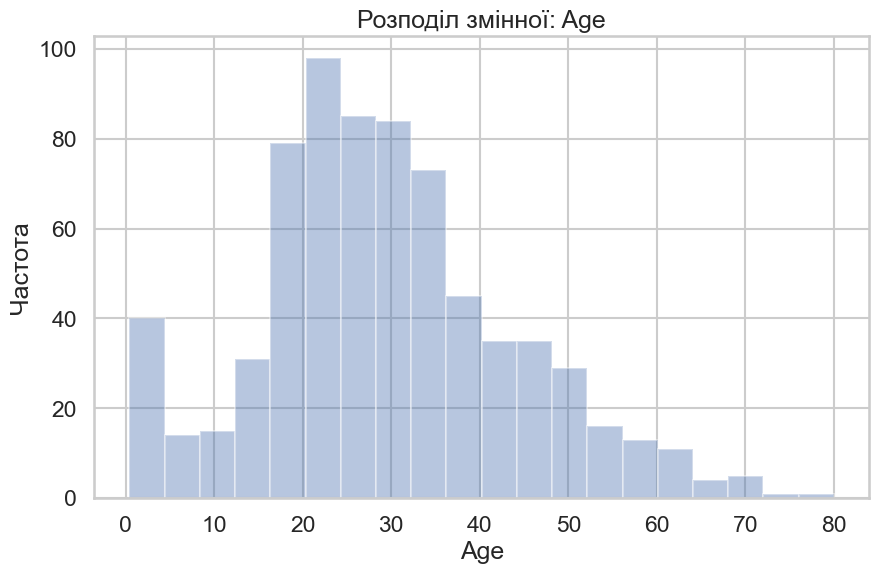

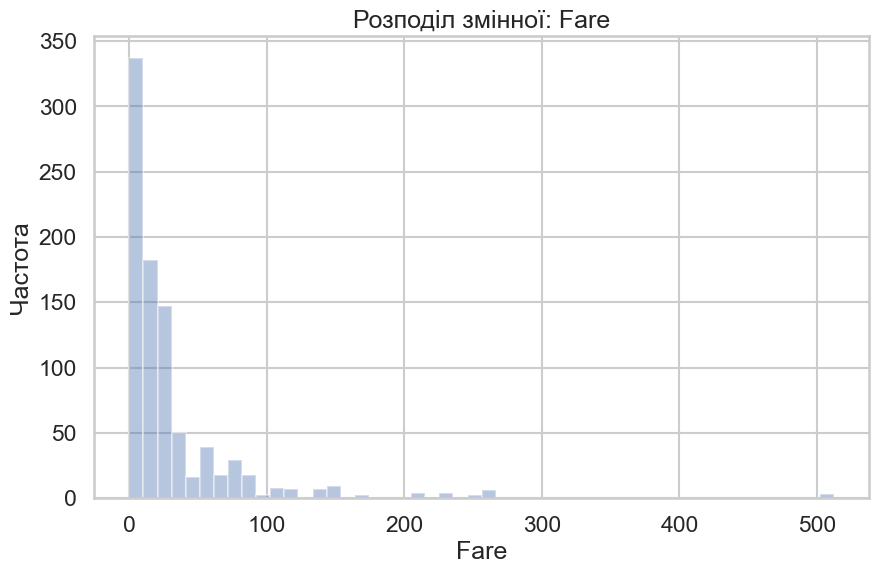

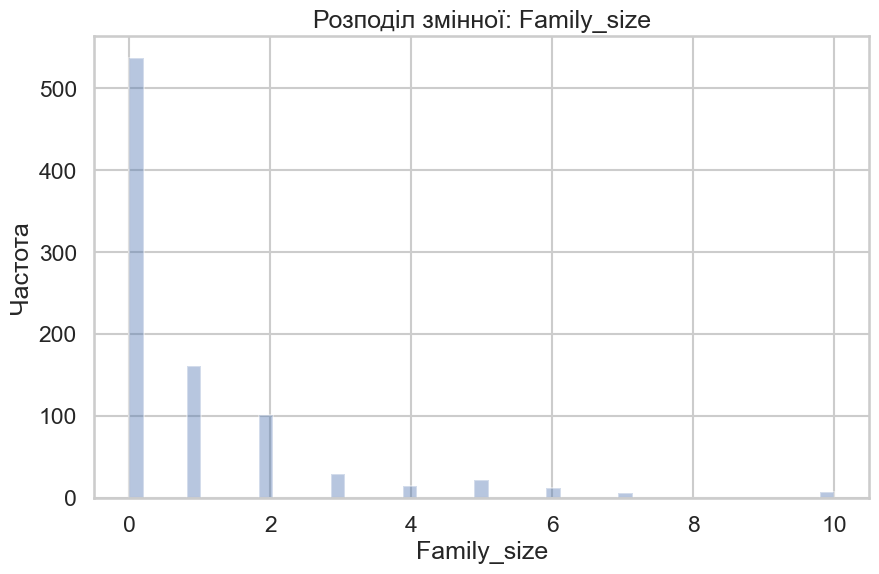

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Числові змінні, які ми розглядаємо
numeric_columns = ['Age', 'Fare', 'Family_size']

# Побудова діаграм розподілу для кожної числової змінної
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(df[column].dropna(), kde=False)
    plt.title(f'Розподіл змінної: {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()


Графіки розподілу числових змінних дозволяють отримати уявлення про розподіл значень кожної змінної в датасеті. Ось деякі висновки з аналізу графіків:

1. **Розподіл віку (Age)**: Розподіл віку пасажирів показує, що більшість з них були молодші за 40 років, але були також і пасажири середнього віку. Графік може мати кілька піків або бути нормально розподіленим.

2. **Розподіл вартості квитка (Fare)**: Розподіл вартості квитка показує, що більшість квитків мають невелику вартість, але є також квитки з високою вартістю. Графік може бути скошеним вправо з довгим хвостом вправо через високу ціну кількох квитків.

3. **Розподіл розміру сім'ї (Family_size)**: Розподіл розміру сім'ї показує, що більшість пасажирів подорожували без родини або мали невелику родину. Це може бути показником того, що більшість пасажирів були самотніми або подорожували лише з найближчими членами сім'ї.

Графіки розподілу допомагають отримати уявлення про характеристики числових змінних у датасеті та можуть бути корисними для подальшого аналізу даних і вибору моделей.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

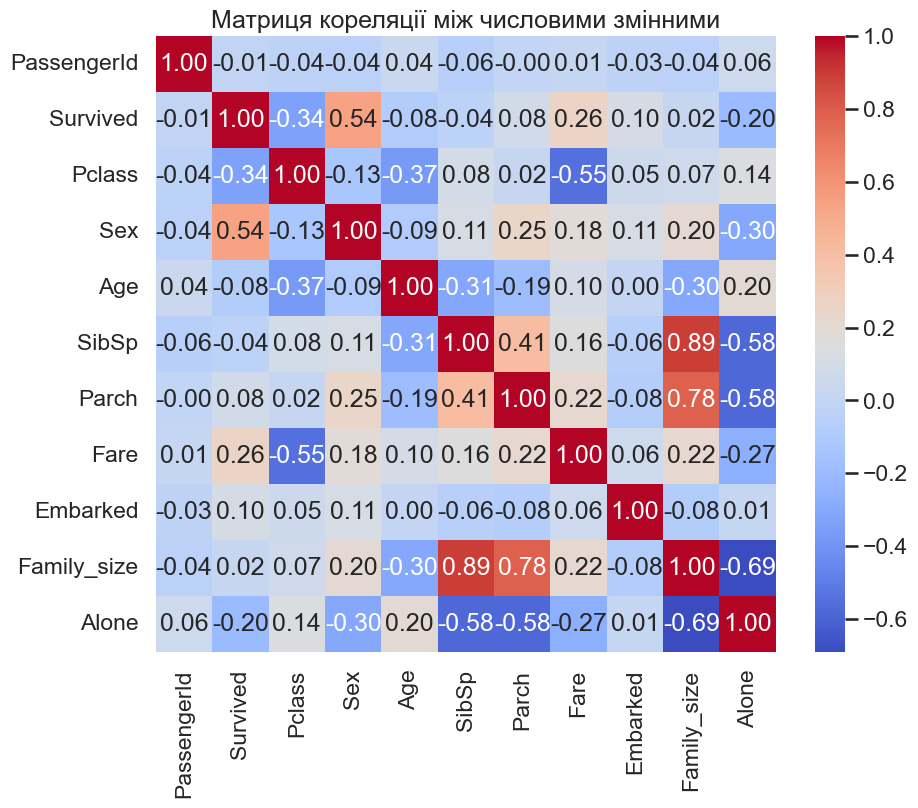

In [108]:
# Вибираємо тільки числові колонки для побудови матриці кореляції
numeric_columns = df.select_dtypes(include=[np.number])

# Побудова матриці кореляції
correlation_matrix = numeric_columns.corr()

# Відображення матриці кореляції у вигляді теплокарти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матриця кореляції між числовими змінними')
plt.show()



Графік теплової карти матриці кореляції числових змінних надає важливу інформацію про взаємозв'язки між різними змінними у датасеті. Ось деякі висновки з аналізу теплової карти кореляції:

1. **Взаємозв'язок між числовими змінними**: Графік демонструє ступінь взаємозв'язку між різними числовими змінними. Зазвичай кореляція може бути позитивною (зростає одна змінна, зростає інша), від'ємною (зростає одна змінна, зменшується інша) або близькою до нуля (взаємозв'язок відсутній).

2. **Сильна кореляція**: Значення, які близькі до 1 або -1, свідчать про сильний взаємозв'язок між змінними. Наприклад, якщо дві змінні мають кореляційний коефіцієнт близький до 1, це означає, що вони сильно позитивно корелюють.

3. **Слабка кореляція**: Значення, які близькі до 0, показують слабкий взаємозв'язок між змінними. Вони можуть бути взагалі некорельованими або мати дуже слабкий взаємозв'язок.

4. **Незначна кореляція**: Значення кореляції близькі до 0 не вказують на наявність взаємозв'язку між змінними.

Графік теплової карти кореляції допомагає зрозуміти, які змінні корелюють між собою та як це може вплинути на аналіз даних або моделювання.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.